https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

## Import module

In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

from __future__ import print_function

=> https://wotres.tistory.com/entry/from-future-%EB%AA%A8%EB%93%88-%EC%82%AC%EC%9A%A9-%EC%9D%B4%EC%9C%A0

=> https://docs.python.org/ko/3/library/__future__.html



## Data Load

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
help(class_names)

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

In [3]:
# image_datsets의 key값
print("image_datasets의 key값 : ", image_datasets.keys())

# image_datasets의 value값
print("\nimage_datasets의 value 값 : ", image_datasets.values())

print("dataloaders의 keys값 : ", dataloaders.keys())
print("dataloaders의 value값 : ", dataloaders.values())

image_datasets의 key값 :  dict_keys(['train', 'val'])

image_datasets의 value 값 :  dict_values([Dataset ImageFolder
    Number of datapoints: 244
    Root location: hymenoptera_data\train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ), Dataset ImageFolder
    Number of datapoints: 153
    Root location: hymenoptera_data\val
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )])
dataloaders의 keys값 :  dict_keys(['train', 'val'])
dataloaders의 value값 :  dict_values([<torch.utils.data.dataload

num_workers : https://jybaek.tistory.com/799

class_names = image_datasets['train'].classes : 구글링해도 안나옴...

## Visualize a few images

tensor([0, 1, 1, 0])
out.shape :  torch.Size([3, 228, 906])
inp.shape :  torch.Size([3, 228, 906])
inp.shape(transpose) :  (228, 906, 3)


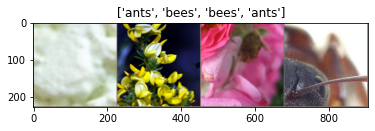

In [4]:
def imshow(inp, title=None):
    """Imshow for Tensor. inp : Tensor"""
    print("inp.shape : ", inp.shape)
    inp = inp.numpy().transpose((1, 2, 0))
    print("inp.shape(transpose) : ", inp.shape)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    
#     # inp 1
#     print("inp 1 : ", inp)
    
    inp = np.clip(inp, 0, 1)

#     # inp 2
#     print("inp 2 : ", inp)    
    
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
        
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# print(inputs)
print(classes) # => 0은 ants, 1은 bees

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
print("out.shape : ", out.shape)

imshow(out, title=[class_names[x] for x in classes])

***numpy.clip(array, min, max)***  
: array 내의 element들에 대해서 min 값 보다 작은 값들을 min값으로 바꿔주고 max 값 보다 큰 값들을 max값으로 바꿔주는 함수

***iter & next***  
https://dojang.io/mod/page/view.php?id=2408

***np.transpose***  
https://pybasall.tistory.com/124

***make_grid***  
https://pytorch.org/vision/stable/utils.html#:~:text=torchvision.utils.make_grid

***pyplot.imshow()***  
imshow 입력 값은 (M, N, 3) => (행, 열, 3채널)  
imshow에 입력으로 넣기위해 transpose 사용함  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#:~:text=(M%2C%20N%2C%203)%3A%20an%20image%20with%20RGB%20values%20(0-1%20float%20or%200-255%20int).

In [5]:
out.shape

torch.Size([3, 228, 906])

In [6]:
inputs.shape

torch.Size([4, 3, 224, 224])

In [7]:
classes.shape

torch.Size([4])

In [8]:
print(inputs.shape)

A = torchvision.utils.make_grid(inputs)
print(A.shape)

torch.Size([4, 3, 224, 224])
torch.Size([3, 228, 906])


In [9]:
help(torchvision.utils.make_grid)

Help on function make_grid in module torchvision.utils:

make_grid(tensor: Union[torch.Tensor, List[torch.Tensor]], nrow: int = 8, padding: int = 2, normalize: bool = False, value_range: Union[Tuple[int, int], NoneType] = None, scale_each: bool = False, pad_value: int = 0, **kwargs) -> torch.Tensor
    Make a grid of images.
    
    Args:
        tensor (Tensor or list): 4D mini-batch Tensor of shape (B x C x H x W)
            or a list of images all of the same size.
        nrow (int, optional): Number of images displayed in each row of the grid.
            The final grid size is ``(B / nrow, nrow)``. Default: ``8``.
        padding (int, optional): amount of padding. Default: ``2``.
        normalize (bool, optional): If True, shift the image to the range (0, 1),
            by the min and max values specified by :attr:`range`. Default: ``False``.
        value_range (tuple, optional): tuple (min, max) where min and max are numbers,
            then these numbers are used to norm

## Training the model  
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html#:~:text=x%20in%20classes%5D)-,Training%20the%20model,-Now%2C%20let%E2%80%99s%20write  
- Scheduling the learning rate
- Saving the best model

In [10]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

***model.state_dict()***  
https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html  

***with***  
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221653260516  

***_, pred***  
https://mingrammer.com/underscore-in-python/#:~:text=_%20*%2020%0A600-,2.%20%EA%B0%92%EC%9D%84%20%EB%AC%B4%EC%8B%9C%ED%95%98%EA%B3%A0%20%EC%8B%B6%EC%9D%80%20%EA%B2%BD%EC%9A%B0,-_%EB%8A%94%20%EB%98%90%ED%95%9C

## Visualizing the model predictions  
Generic function to display predictions for a few images  


In [11]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

***torch.no_grad() & model.eval()***  
https://coffeedjimmy.github.io/pytorch/2019/11/05/pytorch_nograd_vs_train_eval/

## Finetuning the convnet  
Load a pretrained model and reset final fully connected layer.

In [12]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

***model_ft.fc***  
https://steemit.com/kr/@codingart/7-30-pytorch-transfer-learning-iv-fine-tuning  

## Train and evaluate  
It should take around 15-25 min on CPU. On GPU though, it takes less than a minute.

In [13]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------


C:\Users\Geun\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train Loss: 0.5313 Acc: 0.7459
val Loss: 0.2069 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.4976 Acc: 0.7992
val Loss: 0.2209 Acc: 0.9085

Epoch 2/24
----------
train Loss: 0.6550 Acc: 0.7459
val Loss: 0.1792 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.4578 Acc: 0.8238
val Loss: 0.3276 Acc: 0.8758

Epoch 4/24
----------
train Loss: 0.5247 Acc: 0.7910
val Loss: 0.2985 Acc: 0.9020

Epoch 5/24
----------
train Loss: 0.5450 Acc: 0.7910
val Loss: 0.8007 Acc: 0.7516

Epoch 6/24
----------
train Loss: 0.4190 Acc: 0.8443
val Loss: 0.3615 Acc: 0.8627

Epoch 7/24
----------
train Loss: 0.4739 Acc: 0.8279
val Loss: 0.1345 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.3370 Acc: 0.8607
val Loss: 0.1678 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.4042 Acc: 0.8238
val Loss: 0.1443 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.2764 Acc: 0.8607
val Loss: 0.1589 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.2846 Acc: 0.8730
val Loss: 0.1959 Acc: 0.9216

Epoch 12/24
----------
t

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


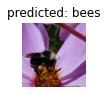

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


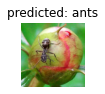

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


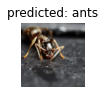

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


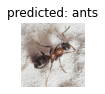

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


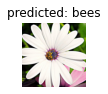

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


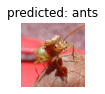

In [14]:
visualize_model(model_ft)

## ConvNet as fixed feature extractor  
Here, we need to freeze all the network except the final layer. We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward().

You can read more about this in the documentation here.  
https://pytorch.org/docs/notes/autograd.html#excluding-subgraphs-from-backward

In [15]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [16]:
# imagenet에서 class가 1000개이므로 param.shape이 1000이 나온다.
# 하지만 여기서는 2개의 class(ants, bees)로만 분류하면 되므로 바꾸어주어야 한다.
param.shape

torch.Size([1000])

## Train and evaluate  
On CPU this will take about half the time compared to previous scenario. This is expected as gradients don’t need to be computed for most of the network. However, forward does need to be computed.

In [17]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6628 Acc: 0.6557
val Loss: 0.2033 Acc: 0.9412

Epoch 1/24
----------
train Loss: 0.4030 Acc: 0.8361
val Loss: 0.1867 Acc: 0.9542

Epoch 2/24
----------
train Loss: 0.5118 Acc: 0.7705
val Loss: 0.1863 Acc: 0.9281

Epoch 3/24
----------
train Loss: 0.6134 Acc: 0.7582
val Loss: 0.1893 Acc: 0.9412

Epoch 4/24
----------
train Loss: 0.3587 Acc: 0.8566
val Loss: 0.1932 Acc: 0.9346

Epoch 5/24
----------
train Loss: 0.4349 Acc: 0.8074
val Loss: 0.1876 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.3525 Acc: 0.8402
val Loss: 0.1848 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.3319 Acc: 0.8402
val Loss: 0.1909 Acc: 0.9542

Epoch 8/24
----------
train Loss: 0.3583 Acc: 0.8156
val Loss: 0.1947 Acc: 0.9477

Epoch 9/24
----------
train Loss: 0.3783 Acc: 0.8484
val Loss: 0.1863 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.3276 Acc: 0.8811
val Loss: 0.2045 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3693 Acc: 0.8197
val Loss: 0.1809 Acc: 0.9477

Ep

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


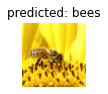

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


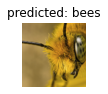

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


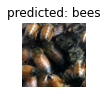

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


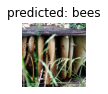

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


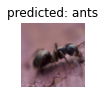

inp.shape :  torch.Size([3, 224, 224])
inp.shape(transpose) :  (224, 224, 3)


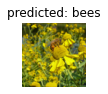

In [18]:
visualize_model(model_conv)

plt.ioff()
plt.show()